<a href="https://colab.research.google.com/github/IOlivaresPalma/Multimedia-Trabajos/blob/main/Actividad_5_OlivaresIvan_197615435.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA
</center></font>


<center><h2>Actividad 5</h2></center>
<center><h3>Audio</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Iván Olivares Palma</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>


## 1. Aplique la transformada rápida de fourier a una señal de audio
<p align="justify">
El archivo de audio debe ser formato .WAV, con menos de 30 segundo de duración.


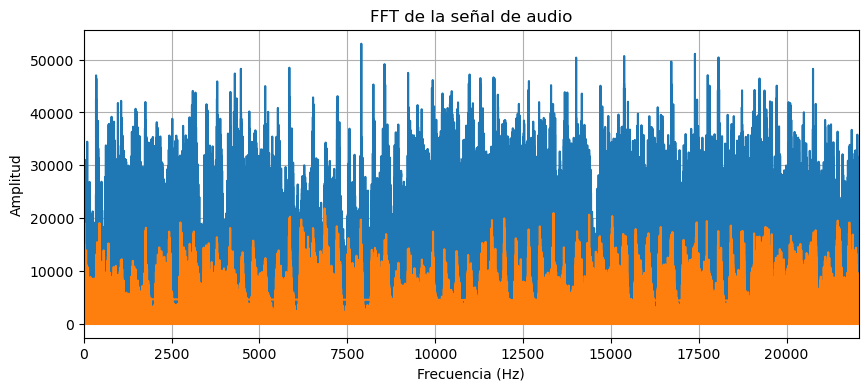

In [ ]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt


# Cargar el archivo de audio
file_path = 'tarea5_2.wav'  # Ruta del archivo .wav a cargar
sample_rate, data = wavfile.read(file_path)  # Lee el archivo .wav y almacena la tasa de muestreo y los datos de la señal

# Aplicar la transformada rápida de Fourier (FFT) a la señal de audio
fft_output = np.fft.fft(data)


# Calcular las frecuencias correspondientes a las muestras de la FFT
frequencies = np.fft.fftfreq(len(data), d=1/sample_rate)


# Graficar el espectro de frecuencia obtenido mediante la FFT
plt.figure(figsize=(10, 4))
plt.plot(frequencies, np.abs(fft_output))
plt.title('FFT de la señal de audio')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.xlim(0, sample_rate/2)
plt.grid(True)
plt.show()


## 2. Obtén el espectrograma de tu señal de audio

C:\Users\ioliv\AppData\Local\Temp\ipykernel_17548\1551415918.py:6: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(times, frequencies, 10*np.log10(np.abs(Sxx)), shading='gouraud')


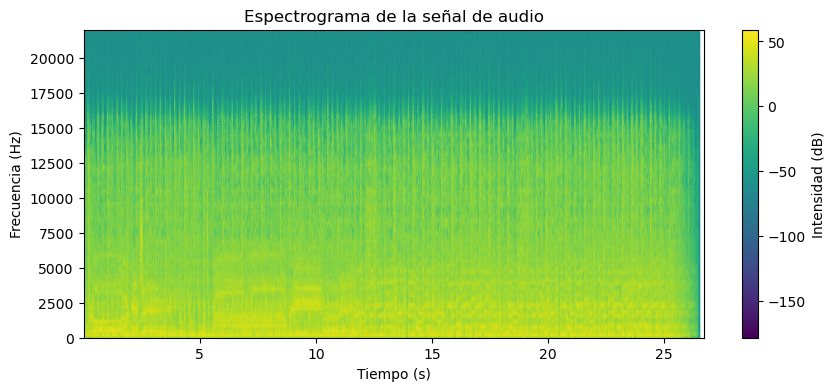

In [ ]:

# Calcular el espectrograma
frequencies, times, Sxx = signal.spectrogram(data[:,1], fs=sample_rate)

# Plotear el espectrograma
plt.figure(figsize=(10, 4))
plt.pcolormesh(times, frequencies, 10*np.log10(np.abs(Sxx)), shading='gouraud')
plt.title('Espectrograma de la señal de audio')
plt.xlabel('Tiempo (s)')
plt.ylabel('Frecuencia (Hz)')
plt.colorbar(label='Intensidad (dB)')
plt.ylim(0, sample_rate/2)
plt.show()

## 3. Slicing
Desarrolla un framento de código que te permita tomar una señal de audio y framentarla en N segmentos o slices. Debe asignar la longitud temporal de cada slice y el programa debe indicar el número de slices que quedan. Considera que al final puede quedar un slice de longitud diferente a todos los demas.

En el slicing debes también incluir un gap o overlap a lado y lado de cada uno de los fragmentos. Este overlap debe ser ajustable del número de muestras que constituyen dicho overlap.


In [ ]:
import numpy as np
from scipy.io import wavfile

def fragment_audio_signal(signal, sample_rate, slice_length_sec, overlap_samples):
    slice_length = int(slice_length_sec * sample_rate)  # Calcula la longitud en muestras de cada slice
    overlap = overlap_samples  # Almacena el número de muestras de solapamiento entre slices

    # Calcula la cantidad total de slices que se pueden obtener
    total_slices = (len(signal) - slice_length) // (slice_length - overlap) + 1

    print("Número de slices:", total_slices)  # Imprime el número total de slices

    # Fragmenta la señal en slices
    slices = []
    for i in range(total_slices):
        start = i * (slice_length - overlap)  # Calcula el índice de inicio de cada slice
        end = start + slice_length  # Calcula el índice de fin de cada slice
        slices.append(signal[start:end])  # Agrega el slice actual a la lista de slices

    # Si queda un slice al final que es más corto que los demás, agrégalo
    if len(signal) > end:
        slices.append(signal[end:])  # Agrega el slice final a la lista de slices
        total_slices += 1  # Incrementa el número total de slices

    return slices, total_slices  # Devuelve la lista de slices y el número total de slices


# Parámetros de fragmentación
slice_length_sec = 2.0  # Duración en segundos de cada slice
overlap_samples = 1000  # Solapamiento en número de muestras entre slices

# Fragmentar la señal de audio en slices
slices, total_slices = fragment_audio_signal(data, sample_rate, slice_length_sec, overlap_samples)

print("Número total de slices:", total_slices)  # Imprime el número total de slices después de la fragmentación


Número de slices: 13
Número total de slices: 14


## 3.1 Slicing usando Pytorch de la señal obtenida en el primer punto.
Debes crear un array con los slices creados a partir de tensores en pytorch.
Grafica un par de tus slices y reproduce el audio.


In [1]:
pip install torch torchvision torchaudio --quiet


Número de slices: 13


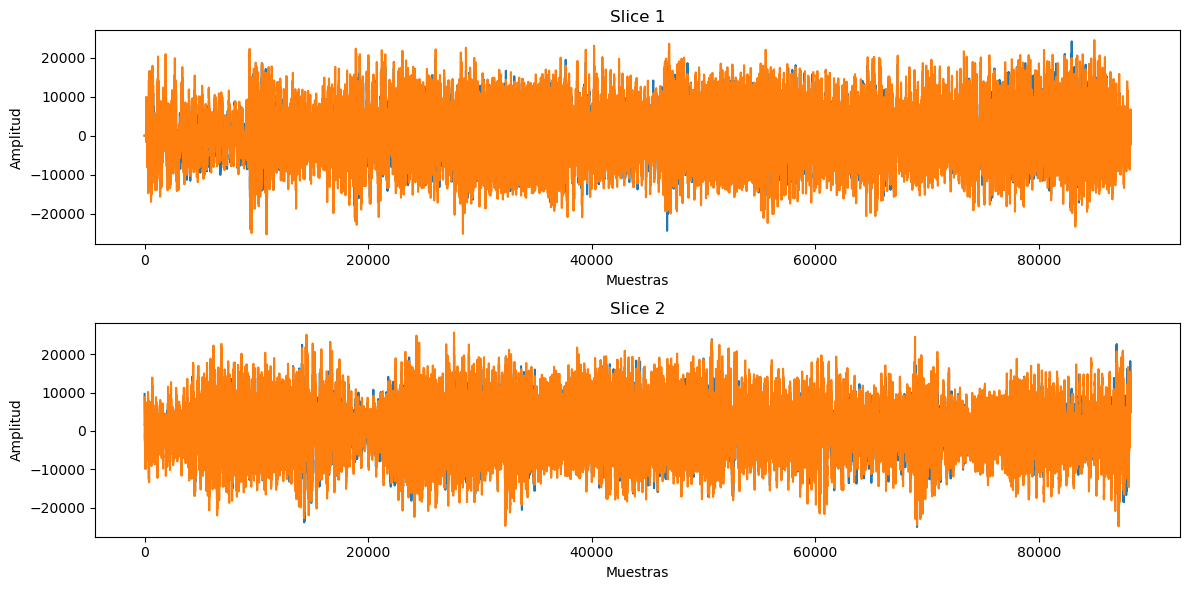

Reproduciendo audio del primer slice...


In [ ]:
import numpy as np
import torch
from scipy.io import wavfile
import matplotlib.pyplot as plt
import sounddevice as sd

# Parámetros de fragmentación
slice_length_sec = 2  # Duración en segundos de cada slice
overlap_samples = 1000  # Solapamiento en número de muestras

# Fragmentar la señal de audio
slices, total_slices = fragment_audio_signal(data, sample_rate, slice_length_sec, overlap_samples)

# Convertir los slices a tensores en PyTorch
slices_tensor = [torch.from_numpy(slice) for slice in slices]

# Graficar un par de slices
plt.figure(figsize=(12, 6))
for i in range(2):
    plt.subplot(2, 1, i+1)
    plt.plot(slices[i])
    plt.title('Slice {}'.format(i+1))
    plt.xlabel('Muestras')
    plt.ylabel('Amplitud')
plt.tight_layout()
plt.show()

# Reproducir el audio del primer slice
print("Reproduciendo audio del primer slice...")
sd.play(slices[6], sample_rate)
sd.wait()

# Para garantizar la reproducción completa del audio antes de continuar
sd.stop()


## 4. Filtro Butterworth para una señal de audio.
Diseña y aplica un filtro butterworth a tu señal de audio.
Muestra un gráfico con la respuesta del filtro butterworth y explica el resultado.

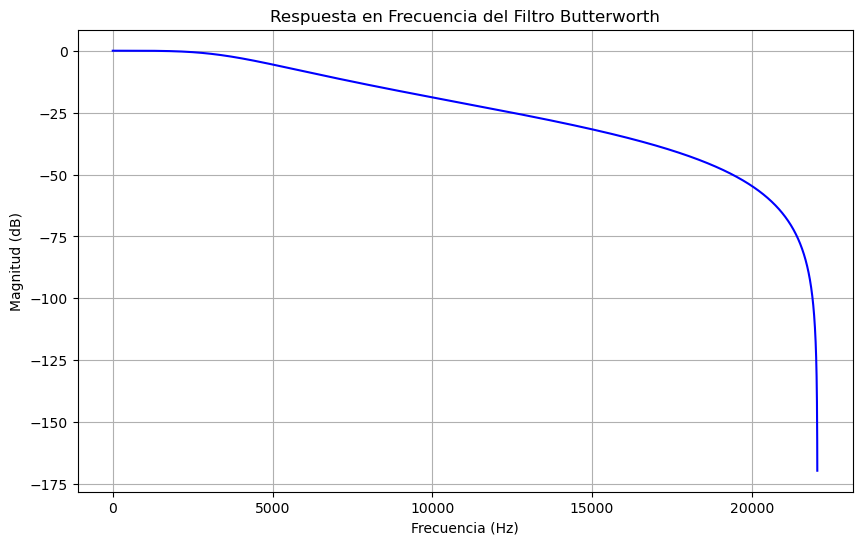

In [ ]:

from scipy.signal import butter, lfilter, freqz

# Función para aplicar un filtro Butterworth a una señal
def butterworth_filter(data, cutoff_freq, sample_rate, order=5, filter_type='low'):
    nyquist_freq = 0.5 * sample_rate
    normalized_cutoff_freq = cutoff_freq / nyquist_freq
    b, a = butter(order, normalized_cutoff_freq, btype=filter_type, analog=False)
    filtered_data = lfilter(b, a, data)
    return filtered_data


# Parámetros del filtro Butterworth
cutoff_freq = 4000  # Frecuencia de corte del filtro (Hz)
order = 2  # Orden del filtro

# Aplicar el filtro Butterworth a la señal de audio
filtered_data = butterworth_filter(data, cutoff_freq, sample_rate, order=order, filter_type='low')

# Obtener la respuesta en frecuencia del filtro Butterworth
b, a = butter(order, cutoff_freq/(sample_rate/2), btype='low', analog=False)
w, h = freqz(b, a, worN=8000)
magnitude = 20 * np.log10(abs(h))

# Graficar la respuesta en frecuencia del filtro Butterworth
plt.figure(figsize=(10, 6))
plt.plot(0.5 * sample_rate * w / np.pi, magnitude, 'b')
plt.title("Respuesta en Frecuencia del Filtro Butterworth")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud (dB)")
plt.grid()
plt.show()


El gráfico muestra que a 0dB la magnitud de la señal no cambia. Mientras nos alejamos en frecuencia y nos acercamos a la frecuencia de corte, la magnitud de la señal disminuye drasticamente. Esta disminución rápida se debe al orden del filtro.

## 4. Referencias
<p align="justify">
    
[Análisis espectral para audio] https://ccrma.stanford.edu/~jos/mdft/mdft-python.html

[Análisis espectral] https://currents.soest.hawaii.edu/ocn_data_analysis/_static/Spectrum.html

[Archivos de audio][https://programacionpython80889555.wordpress.com/2019/09/10/reproduciendo-archivos-de-audio-en-python-con-pyaudio/](https://programacionpython80889555.wordpress.com/2019/09/10/reproduciendo-archivos-de-audio-en-python-con-pyaudio/)

[filtro butterworth] [https://pythonguia.com/filtro-de-python-scipy-butterworth/](https://pythonguia.com/filtro-de-python-scipy-butterworth/)